In [1]:
import pickle
import matplotlib.pyplot as plt
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten

#training batch size
bs = 32
#epoch for each batch
ep = 10
# the order of batches being trained
curriculum = [1,2,3,4,5]


In [2]:

def train_data_unpickle(data_directory, batch_number):
    with open(data_directory + '/data_batch_' + str(batch_number), mode='rb') as each:
        batch_ = pickle.load(each, encoding='latin1')
        # batch_label = batch_['batch_label']
        data = batch_['data'].reshape((len(batch_['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
        # filenames = batch_['filenames']
        labels = batch_['labels']
    return data, labels
    # return batch_label, data, filenames, labels
# returns data, labels


In [3]:
def test__data_unpickle(data_directory):
    with open(data_directory + '/test_batch', mode='rb') as each:
        batch_ = pickle.load(each, encoding='latin1')
        # batch_label = batch_['batch_label']
        data = batch_['data'].reshape((len(batch_['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
        # filenames = batch_['filenames']
        labels = batch_['labels']
    return data, labels
    # return batch_label, data, filenames, labels
# returns data, labels

In [4]:
def reading_train_data (data_directory, batch_number):
    train_data, train_labels = train_data_unpickle(data_directory, batch_number)
    train_labels = np_utils.to_categorical (train_labels)
    return train_data, train_labels
# returns train_data, train_labels

In [5]:
def reading_test__data (data_directory):
    test__data, test__labels = test__data_unpickle(data_directory)
    test__labels = np_utils.to_categorical(test__labels)
    return test__data, test__labels
# returns test__data, test__labels

In [6]:
def training_model(load, P_train_data, P_train_labels, P_test__data, P_test__labels):
    model = Sequential()
    if load == 0:
        model.add(Conv2D(32, (3, 3), padding='same', input_shape=P_train_data.shape[1:]))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, (3, 3), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
         
        model.add(Flatten())
        model.add(Dense(512))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10))
        model.add(Activation('softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        K.set_value(model.optimizer.learning_rate, 0.001) 
        P_train_data = P_train_data.astype('float32')
        P_test__data = P_test__data.astype('float32')
        P_train_data /= 255
        P_test__data /= 255
         
        hist = model.fit(P_train_data, P_train_labels, validation_data=(P_test__data, P_test__labels), batch_size = bs, epochs=ep)
        
        model.save("/home/eoj/Documents/model/without_curriculum.h5")
        return model, hist
    else:
        model = keras.models.load_model("/home/eoj/Documents/model/without_curriculum.h5")
        hist = model.fit(train_data, train_labels, validation_data=(test__data, test__labels), batch_size = bs, epochs=ep)
        model.save("/home/eoj/Documents/model/without_curriculum.h5")
        return model, hist
# returns model, hist


In [7]:
def model_evaluation( batch_number, hist, test__data, test__labels ):
    scores = model.evaluate(test__data, test__labels, verbose=0)
    print("\nBatch number " + str(batch_number) + ": CNN Error: %.2f%%" % (100-scores[1]*100))
     
    fig, acc_ax = plt.subplots()
    
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    
    acc_ax.set_xlabel('epoch')
    acc_ax.set_ylabel('accuracy')
    
    acc_ax.legend(loc='lower left')
    plt.ylim(0,1) 
    plt.show()


Epoch 1/10
313/313 [==============================] - 31s 62ms/step - loss: 2.1329 - accuracy: 0.3128 - val_loss: 2.5743 - val_accuracy: 0.1843
Epoch 2/10
313/313 [==============================] - 19s 60ms/step - loss: 1.4354 - accuracy: 0.4889 - val_loss: 1.3914 - val_accuracy: 0.5075
Epoch 3/10
313/313 [==============================] - 19s 61ms/step - loss: 1.2011 - accuracy: 0.5707 - val_loss: 1.3761 - val_accuracy: 0.5300
Epoch 4/10
313/313 [==============================] - 19s 60ms/step - loss: 1.0124 - accuracy: 0.6437 - val_loss: 1.2007 - val_accuracy: 0.5879
Epoch 5/10
313/313 [==============================] - 19s 60ms/step - loss: 0.9304 - accuracy: 0.6643 - val_loss: 1.0168 - val_accuracy: 0.6391
Epoch 6/10
313/313 [==============================] - 19s 60ms/step - loss: 0.8406 - accuracy: 0.7033 - val_loss: 1.0705 - val_accuracy: 0.6201
Epoch 7/10
313/313 [==============================] - 19s 60ms/step - loss: 0.7926 - accuracy: 0.7176 - val_loss: 1.1374 - val_accuracy:

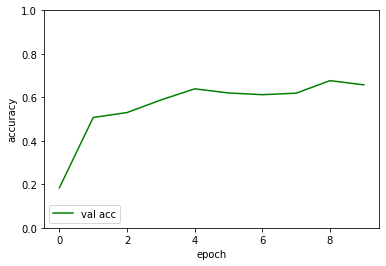

Epoch 1/10
313/313 [==============================] - 20s 61ms/step - loss: 1.0180 - accuracy: 0.6506 - val_loss: 0.8235 - val_accuracy: 0.7149
Epoch 2/10
313/313 [==============================] - 19s 60ms/step - loss: 0.8097 - accuracy: 0.7147 - val_loss: 0.8255 - val_accuracy: 0.7097
Epoch 3/10
313/313 [==============================] - 19s 60ms/step - loss: 0.7365 - accuracy: 0.7366 - val_loss: 0.8858 - val_accuracy: 0.6816
Epoch 4/10
313/313 [==============================] - 19s 60ms/step - loss: 0.6562 - accuracy: 0.7700 - val_loss: 1.0057 - val_accuracy: 0.6729
Epoch 5/10
313/313 [==============================] - 18s 58ms/step - loss: 0.5892 - accuracy: 0.7897 - val_loss: 0.8244 - val_accuracy: 0.7256
Epoch 6/10
313/313 [==============================] - 19s 60ms/step - loss: 0.5298 - accuracy: 0.8108 - val_loss: 0.9381 - val_accuracy: 0.6935
Epoch 7/10
313/313 [==============================] - 19s 60ms/step - loss: 0.4863 - accuracy: 0.8232 - val_loss: 0.8490 - val_accuracy:

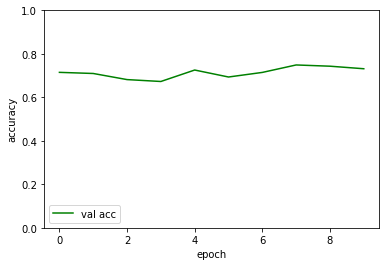

Epoch 1/10
313/313 [==============================] - 20s 62ms/step - loss: 0.9398 - accuracy: 0.6976 - val_loss: 0.7841 - val_accuracy: 0.7239
Epoch 2/10
313/313 [==============================] - 20s 63ms/step - loss: 0.6956 - accuracy: 0.7580 - val_loss: 0.7243 - val_accuracy: 0.7479
Epoch 3/10
312/313 [============================>.] - ETA: 0s - loss: 0.5966 - accuracy: 0.7883

In [ ]:

test__data, test__labels = reading_test__data(
    '/home/eoj/Documents/data/cifar-10-batches-py')

train_data, train_labels = reading_train_data(
    '/home/eoj/Documents/data/cifar-10-batches-py/', curriculum[0])
model, hist = training_model(0, train_data, train_labels, test__data, test__labels)
model_evaluation(curriculum[0] ,hist, test__data, test__labels)

train_data, train_labels = reading_train_data(
    '/home/eoj/Documents/data/cifar-10-batches-py/', curriculum[1])
model, hist = training_model(-1, train_data, train_labels, test__data, test__labels)
model_evaluation(curriculum[1] ,hist, test__data, test__labels)

train_data, train_labels = reading_train_data(
    '/home/eoj/Documents/data/cifar-10-batches-py/', curriculum[2])
model, hist = training_model(-1, train_data, train_labels, test__data, test__labels)
model_evaluation(curriculum[2],hist, test__data, test__labels)

train_data, train_labels = reading_train_data(
    '/home/eoj/Documents/data/cifar-10-batches-py/',curriculum[3])
model, hist = training_model(-1, train_data, train_labels, test__data, test__labels)
model_evaluation(curriculum[3], hist, test__data, test__labels)

train_data, train_labels = reading_train_data(
    '/home/eoj/Documents/data/cifar-10-batches-py/',curriculum[4])
model, hist = training_model(-1, train_data, train_labels, test__data, test__labels)
model_evaluation(curriculum[4], hist, test__data, test__labels)
